<a href="https://colab.research.google.com/github/Ahsana-Ahffan/E-Commerce-Recommender-System/blob/master/Snakes_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install torch


In [54]:
!pip install "torch==1.4" "torchvision==0.5.0"

In [55]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Import necessary libraries

In [56]:

from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import sklearn as sk
#from sklearn.metrics import precision_score,recall_score
#from sklearn.preprocessing import label_binarize

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
path = Path('/content/drive/My Drive/Snakespics/Train')

In [59]:
path.ls

<bound method <lambda> of PosixPath('/content/drive/My Drive/Snakespics/Train')>

In [60]:
fnames=get_image_files(path)

In [61]:

fnames[:5]

[PosixPath('/content/drive/My Drive/Snakespics/Train/kraitsnake10.jpeg'),
 PosixPath('/content/drive/My Drive/Snakespics/Train/kraitsnake14.jpeg'),
 PosixPath('/content/drive/My Drive/Snakespics/Train/kraitsnake15.jpeg'),
 PosixPath('/content/drive/My Drive/Snakespics/Train/python10.jpeg'),
 PosixPath('/content/drive/My Drive/Snakespics/Train/python14.jpeg')]

In [62]:
len(fnames)

126

In [63]:
np.random.seed(2)
pat = r'/([^/]+)\d{2}.jpeg$'
bs=6

In [64]:
imagenet_stats

([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

In [66]:

data=ImageDataBunch.from_name_re(path,fnames,pat,ds_tfms=get_transforms(),size=224,bs=bs)
data.normalize(imagenet_stats)


ImageDataBunch;

Train: LabelList (101 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
kraitsnake,python,malabar_pit_viper,malabar_pit_viper,malabar_pit_viper
Path: /content/drive/My Drive/Snakespics/Train;

Valid: LabelList (25 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
humpnosedviper,sawscaledviper,ratsnake,python,Indiancobra
Path: /content/drive/My Drive/Snakespics/Train;

Test: None

In [67]:
print(data.classes)

['Indiancobra', 'humpnosedviper', 'kraitsnake', 'malabar_pit_viper', 'python', 'ratsnake', 'russelsviper', 'sandboa', 'sawscaledviper', 'wolfsnake']


In [68]:

classdata=data.classes
classdata

['Indiancobra',
 'humpnosedviper',
 'kraitsnake',
 'malabar_pit_viper',
 'python',
 'ratsnake',
 'russelsviper',
 'sandboa',
 'sawscaledviper',
 'wolfsnake']

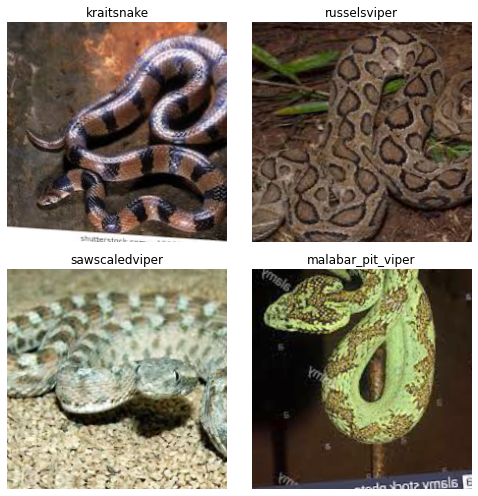

In [69]:

data.show_batch(rows=2,figsize=(7,7))

**Training:Resnet34**

In [70]:

learn=cnn_learner(data,models.resnet34,metrics=error_rate)

In [71]:

#learn.model

In [72]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,3.627049,1.543279,0.560000,00:02
1,2.515937,0.938474,0.240000,00:02
2,1.880072,0.607999,0.200000,00:02
3,1.387086,0.615136,0.200000,00:02
4,1.071826,0.672653,0.200000,00:02


In [73]:
learn.save('stage-1')

In [74]:
interp=ClassificationInterpretation.from_learner(learn)

In [75]:
interp.most_confused()

[('Indiancobra', 'kraitsnake', 1),
 ('humpnosedviper', 'ratsnake', 1),
 ('malabar_pit_viper', 'sawscaledviper', 1),
 ('python', 'russelsviper', 1),
 ('ratsnake', 'sandboa', 1)]

In [76]:
cm=interp.confusion_matrix()
cm

array([[2, 0, 1, 0, ..., 0, 0, 0, 0],
       [0, 2, 0, 0, ..., 0, 0, 0, 0],
       [0, 0, 2, 0, ..., 0, 0, 0, 0],
       [0, 0, 0, 2, ..., 0, 0, 1, 0],
       ...,
       [0, 0, 0, 0, ..., 2, 0, 0, 0],
       [0, 0, 0, 0, ..., 0, 1, 0, 0],
       [0, 0, 0, 0, ..., 0, 0, 4, 0],
       [0, 0, 0, 0, ..., 0, 0, 0, 0]])

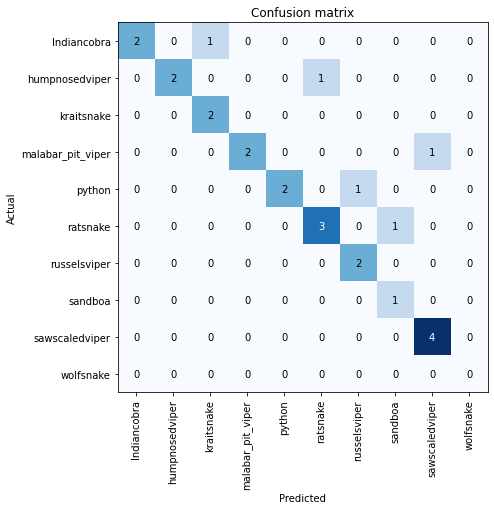

In [77]:
interp.plot_confusion_matrix(figsize=(15,7))

In [78]:
learn.unfreeze()

In [82]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.625572,0.639773,0.200000,00:02
1,0.817690,0.763952,0.160000,00:02
2,0.715004,0.381919,0.120000,00:02


In [83]:
learn.load('stage-1');

In [84]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


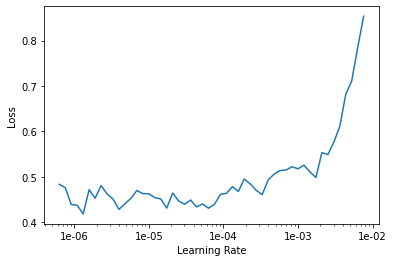

In [85]:
learn.recorder.plot()

In [86]:
learn.fit_one_cycle(25,max_lr=slice(1e-06,1e-04))

epoch,train_loss,valid_loss,error_rate,time
0,0.460304,0.660673,0.200000,00:02
1,0.490142,0.682610,0.200000,00:02
2,0.429671,0.721052,0.200000,00:02
3,0.444577,0.597874,0.200000,00:02
4,0.486755,0.635167,0.200000,00:02
5,0.501947,0.611646,0.200000,00:02
6,0.502499,0.535239,0.200000,00:02
7,0.483735,0.618729,0.200000,00:02
8,0.466198,0.569062,0.200000,00:02
9,0.460735,0.601419,0.200000,00:02


In [ ]:
#learn.fit_one_cycle(5)

In [87]:
interpn=ClassificationInterpretation.from_learner(learn)

In [88]:
con_mat=interp.confusion_matrix()

In [89]:
import numpy as np
recall = np.diag(con_mat) / np.sum(con_mat, axis = 1)
precision = np.diag(con_mat) / np.sum(con_mat, axis = 0)
recall,precision

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


(array([0.666667, 0.666667, 1.      , 0.666667, 0.666667, 0.75    , 1.      , 1.      , 1.      ,      nan]),
 array([1.      , 1.      , 0.666667, 1.      , 1.      , 0.75    , 0.666667, 0.5     , 0.8     ,      nan]))

In [91]:
data_df = {'Snake Type': classdata, 'Precision': precision,'Recall':recall}
df = pd.DataFrame(data=data_df)

In [92]:
df

,Snake Type,Precision,Recall
0,Indiancobra,1.000000,0.666667
1,humpnosedviper,1.000000,0.666667
2,kraitsnake,0.666667,1.000000
3,malabar_pit_viper,1.000000,0.666667
4,python,1.000000,0.666667
5,ratsnake,0.750000,0.750000
6,russelsviper,0.666667,1.000000
7,sandboa,0.500000,1.000000
8,sawscaledviper,0.800000,1.000000
9,wolfsnake,NaN,NaN


In [93]:
Average=df.mean(axis=0,skipna=True)
Average

Precision    0.820370
Recall       0.824074
dtype: float64

**Testing**

In [94]:
path_test=Path('drive/My Drive/Snakespics/Test')

In [95]:
get_image_files(path_test)

[PosixPath('drive/My Drive/Snakespics/Test/kraitsnake11.jpeg'),
 PosixPath('drive/My Drive/Snakespics/Test/kraitsnake12.jpeg'),
 PosixPath('drive/My Drive/Snakespics/Test/kraitsnake13.jpeg'),
 PosixPath('drive/My Drive/Snakespics/Test/python11.jpeg'),
 PosixPath('drive/My Drive/Snakespics/Test/python12.jpeg'),
 PosixPath('drive/My Drive/Snakespics/Test/python13.jpeg'),
 PosixPath('drive/My Drive/Snakespics/Test/malabar_pit_viper15.jpeg'),
 PosixPath('drive/My Drive/Snakespics/Test/ratsnake15.jpeg'),
 PosixPath('drive/My Drive/Snakespics/Test/russelsviper12.jpeg'),
 PosixPath('drive/My Drive/Snakespics/Test/russelsviper13.jpeg'),
 PosixPath('drive/My Drive/Snakespics/Test/russelsviper14.jpeg'),
 PosixPath('drive/My Drive/Snakespics/Test/sandboa12.jpeg'),
 PosixPath('drive/My Drive/Snakespics/Test/sandboa13.jpeg'),
 PosixPath('drive/My Drive/Snakespics/Test/sandboa14.jpeg'),
 PosixPath('drive/My Drive/Snakespics/Test/sawscaledviper12.jpeg'),
 PosixPath('drive/My Drive/Snakespics/Test/saw

In [96]:
for filename in os.listdir(path_test):
  predict_img = open_image(path_test/  filename)
  print("The prediction of image " +filename ,"is " +str(learn.predict(predict_img)[0]))
  #print("The prediction of the image is a "+str(learn.predict(predict_img)[0]))
  predict_img
  

The prediction of image kraitsnake11.jpeg is kraitsnake
The prediction of image kraitsnake12.jpeg is kraitsnake
The prediction of image kraitsnake13.jpeg is kraitsnake
The prediction of image python11.jpeg is russelsviper
The prediction of image python12.jpeg is kraitsnake
The prediction of image python13.jpeg is python
The prediction of image malabar_pit_viper15.jpeg is malabar_pit_viper
The prediction of image ratsnake15.jpeg is python
The prediction of image russelsviper12.jpeg is russelsviper
The prediction of image russelsviper13.jpeg is russelsviper
The prediction of image russelsviper14.jpeg is russelsviper
The prediction of image sandboa12.jpeg is sandboa
The prediction of image sandboa13.jpeg is sandboa
The prediction of image sandboa14.jpeg is sandboa
The prediction of image sawscaledviper12.jpeg is sawscaledviper
The prediction of image sawscaledviper13.jpeg is sawscaledviper
The prediction of image sawscaledviper14.jpeg is sawscaledviper
The prediction of image Indiancobra1

In [102]:
predict_img = open_image(path_test/'Indiancobra10.jpeg')
print("The prediction of the image is a "+str(learn.predict(predict_img)[0]))


The prediction of the image is a Indiancobra


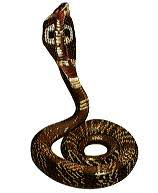

In [103]:
predict_img

In [104]:
predict_img = open_image(path_test/'russelsviper14.jpeg')
print("The prediction of the image is a "+str(learn.predict(predict_img)[0]))


The prediction of the image is a russelsviper


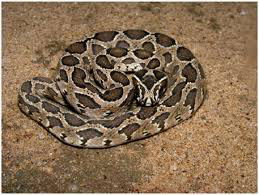

In [105]:
predict_img

**Conclusion**

Successfully implemented a multiclass image classification model to classify 10 types of snakes with  metric values


*   Error rate  = 0.08
*   Precision   = 0.922222  
*   Recall      = 0.935185

There is scope for improvement on the model by bringing better training images.



